In [1]:
!unzip "source.zip" -d "/content"

Archive:  source.zip
  inflating: /content/python_stat_sample-master/.gitignore  
   creating: /content/python_stat_sample-master/.ipynb_checkpoints/
   creating: /content/python_stat_sample-master/animation/
   creating: /content/python_stat_sample-master/animation/.ipynb_checkpoints/
  inflating: /content/python_stat_sample-master/animation/.ipynb_checkpoints/chap02_anim-checkpoint.ipynb  
   creating: /content/python_stat_sample-master/animation/__pycache__/
  inflating: /content/python_stat_sample-master/animation/__pycache__/plot_util.cpython-37.pyc  
  inflating: /content/python_stat_sample-master/animation/chap02_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap03_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap04_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap06_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap08_anim.ipynb  
  inflating: /content/python_stat_sample-master

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import comb
from scipy.special import factorial

%precision 3
%matplotlib inline

In [3]:
linestyles=['-','--',':']

def E(X,g=lambda x:x):
  x_set,f=X
  return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
  x_set,f=X
  mean=E(X,g)
  return np.sum([(g(x_k)-mean)**2 *f(x_k) for x_k in x_set])

def check_prob(X):
  x_set,f=X
  prob=np.array([f(x_k) for x_k in x_set])
  assert np.all(prob>=0),"minus probability"
  prob_sum=np.round(np.sum(prob),6)
  assert prob_sum==1,f'sum of probability{prob_sum}'
  print(f"expected value {E(X):.4}")
  print(f"variance{(V(X)):.4}")

def plot_prob(X):
  x_set,f=X
  prob=np.array([f(x_k) for x_k in x_set])

  fig=plt.figure(figsize=(10,6))
  ax=fig.add_subplot(111)
  ax.bar(x_set,prob,label="prob")
  ax.vlines(E(X),0,1,label="mean")
  ax.set_xticks(np.append(x_set,E(X)))
  ax.set_ylim(0,prob.max()*1.2)
  ax.legend()

  plt.show()

In [4]:
def Bern(p):
  x_set=np.array([0,1])
  def f(x):
    if x in x_set:
      return p**x*(1-p)**(1-x)
    else:
      return 0
  return x_set,f

In [6]:
p=0.3
X=Bern(p)
print(X)

(array([0, 1]), <function Bern.<locals>.f at 0x7ceb3160b4c0>)


In [7]:
check_prob(X)

expected value 0.3
variance0.21


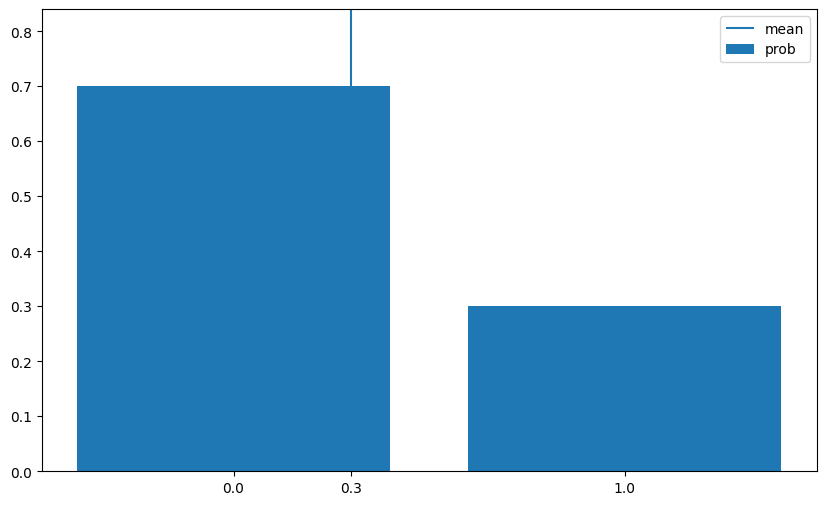

In [8]:
plot_prob(X)

In [10]:
rv=stats.bernoulli(p)

In [12]:
print(rv.pmf(0), rv.pmf(1))

0.7000000000000002 0.3


In [13]:
rv.pmf([0,1])

array([0.7, 0.3])

In [14]:
rv.cdf([0,1])

array([0.7, 1. ])

In [17]:
print("{}, {}".format(rv.mean(),rv.var()))

0.3, 0.21


In [19]:
def Bin(n,p):
  x_set=np.arange(n+1)
  def f(x):
    if x in x_set:
      return comb(n,x) * p**x * (1-p)**(n-x)
    else:
      return 0
  return x_set, f

In [21]:
n=10
p=0.3
X=Bin(n,p)

In [22]:
check_prob(X)

expected value 3.0
variance2.1


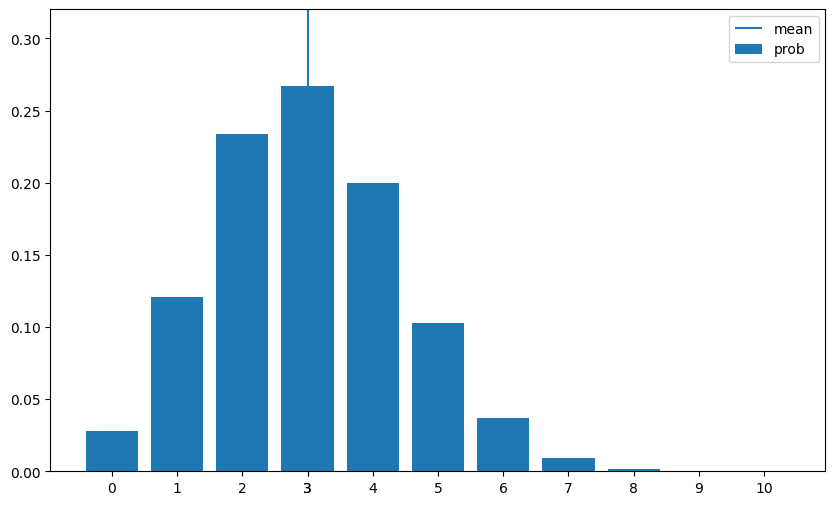

In [23]:
plot_prob(X)

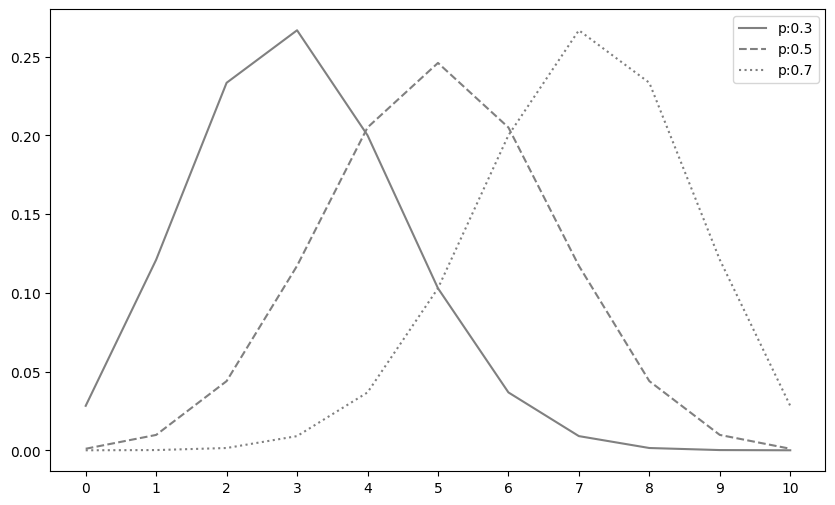

In [24]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

x_set=np.arange(n+1)
for p, ls in zip([0.3,0.5,0.7],linestyles):
  rv=stats.binom(n,p)
  ax.plot(x_set,rv.pmf(x_set),label=f"p:{p}",ls=ls,color="gray")
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [25]:
def Ge(p):
  x_set=np.arange(1,30)
  def f(x):
    if x in x_set:
      return p*(1-p)**(x-1)
    else:
      return 0
  return x_set,f

In [26]:
p=0.5
X=Ge(p)

In [27]:
check_prob(X)

expected value 2.0
variance2.0


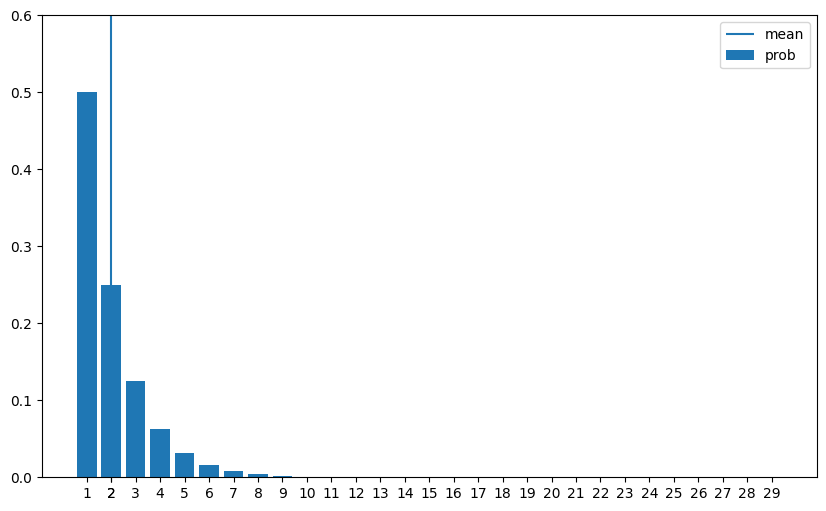

In [28]:
plot_prob(X)

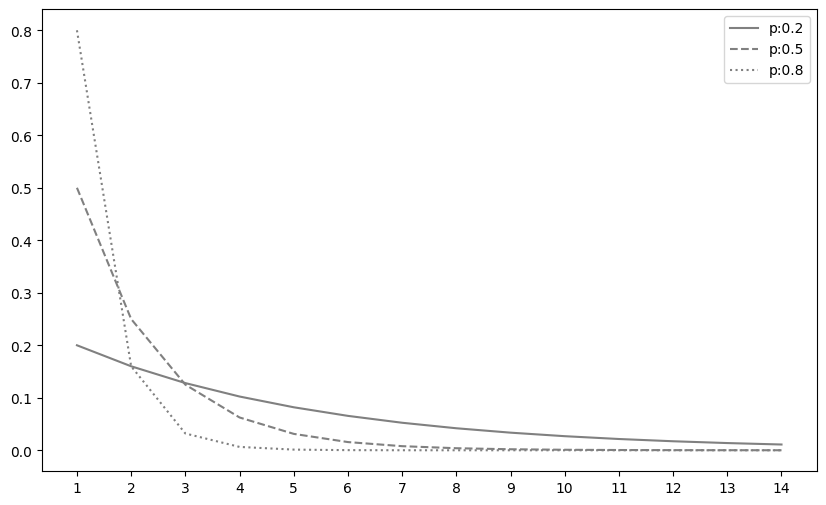

In [29]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

x_set=np.arange(1,15)
for p, ls in zip([0.2,0.5,0.8],linestyles):
  rv=stats.geom(p)
  ax.plot(x_set,rv.pmf(x_set),label=f"p:{p}",ls=ls,color="gray")
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [34]:
def Poi(lam):
  x_set=np.arange(20)
  def f(x):
    if x in x_set:
      return np.power(lam,x)/factorial(x)*np.exp(-lam)
    else:
      return 0
  return x_set,f

In [35]:
lam=3
X=Poi(lam)

In [36]:
check_prob(X)

expected value 3.0
variance3.0


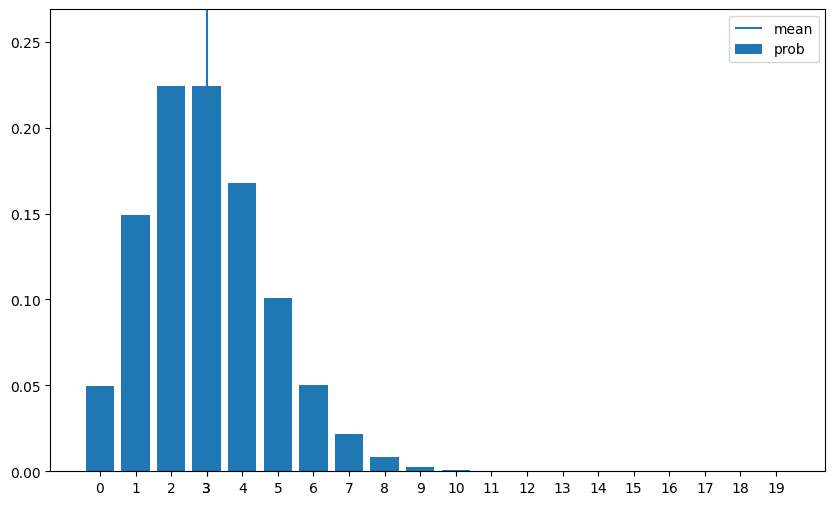

In [37]:
plot_prob(X)

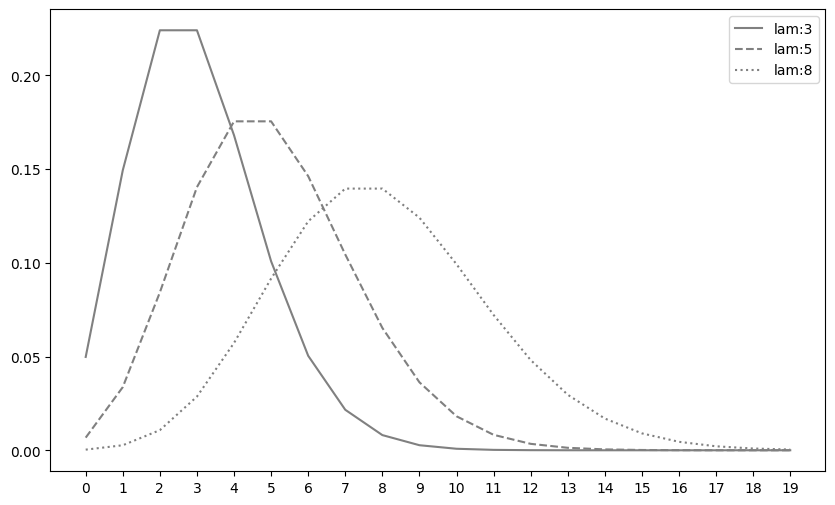

In [38]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

x_set=np.arange(20)
for lam, ls in zip([3,5,8],linestyles):
  rv=stats.poisson(lam)
  ax.plot(x_set,rv.pmf(x_set),label=f"lam:{lam}",ls=ls,color="gray")
ax.set_xticks(x_set)
ax.legend()

plt.show()